In [1]:
import pandas as pd
import matplotlib.pyplot as plt

excel_path = 'comorbidity1_all_param_search_results_gridcv.xlsx'
fs_names = ['L1', 'MutualInfo', 'TreeImportance']

# 读取每个FS方法的val结果
val_dfs = {fs: pd.read_excel(excel_path, sheet_name=f'{fs}_val') for fs in fs_names}

In [2]:
import os
for f in os.listdir():
    if f.endswith('.xlsx'):
        print(f)

sensitivity_diabetes_diag_all_param_search_results_gridcv.xlsx
 comorbidity2_all_param_search_results_gridcv.xlsx
all_param_search_results_gridcv final_cv5.xlsx
comorbidity2_all_param_search_results_gridcv.xlsx
all_sensitivity_results_summary.xlsx
comorbidity1_all_param_search_results_gridcv.xlsx
sensitivity_diabetes_diag1_all_param_search_results_gridcv.xlsx
ccs_icd9_mapping.xlsx
all_param_search_results.xlsx


In [3]:

import pandas as pd

# 文件名与分析类型的映射
analyses = {
    'Comorbidity_2': 'comorbidity2_all_param_search_results_gridcv.xlsx',
    'Comorbidity_1': 'comorbidity1_all_param_search_results_gridcv.xlsx',
    'Diabetes_diag_all': 'sensitivity_diabetes_diag_all_param_search_results_gridcv.xlsx',
    'Diabetes_diag1': 'sensitivity_diabetes_diag1_all_param_search_results_gridcv.xlsx',
    'Main': 'all_param_search_results_gridcv final_cv5.xlsx'
}
fs_names = ['L1', 'MutualInfo', 'TreeImportance']

all_results = []

for analysis, file in analyses.items():
    for fs in fs_names:
        try:
            val_df = pd.read_excel(file, sheet_name=f'{fs}_val')
            test_df = pd.read_excel(file, sheet_name=f'{fs}_test')
        except Exception as e:
            print(f"Error reading {file} {fs}: {e}")
            continue

        # 合并val和test的指标
        for i, row in val_df.iterrows():
            model = row['model']
            # 匹配test集的同一模型
            test_row = test_df[test_df['model'] == model].iloc[0] if not test_df[test_df['model'] == model].empty else None
            test_auc = test_row['test_auc'] if test_row is not None and 'test_auc' in test_row else None
            test_f1 = test_row['test_f1'] if test_row is not None and 'test_f1' in test_row else None

            # 组装所有列（参数单独成列）
            result = {
                'Analysis': analysis,
                'FS': fs,
                'Model': model,
                'val_auc': row.get('val_auc', None),
                'val_f1': row.get('val_f1', None),
                'test_auc': test_auc,
                'test_f1': test_f1
            }
            # 添加所有参数列（自动保留原有参数名和顺序）
            param_cols = [col for col in val_df.columns if col not in ['model', 'fs', 'top_n', 'val_auc', 'val_f1']]
            for col in param_cols:
                result[col] = row.get(col, None)
            all_results.append(result)

# 合并为DataFrame
results_df = pd.DataFrame(all_results)

# 可选：调整列顺序
main_cols = ['Analysis', 'FS', 'Model', 'val_auc', 'val_f1', 'test_auc', 'test_f1']
param_cols = [col for col in results_df.columns if col not in main_cols]
results_df = results_df[main_cols + param_cols]

# 展示前几行
print(results_df.head())

# 如需保存为Excel
results_df.to_excel('all_sensitivity_results_summary.xlsx', index=False)


        Analysis          FS               Model   val_auc    val_f1  \
0  Comorbidity_2          L1        RandomForest  0.599930  0.067854   
1  Comorbidity_2          L1  LogisticRegression  0.607677  0.202190   
2  Comorbidity_2          L1             XGBoost  0.632042  0.017910   
3  Comorbidity_2  MutualInfo        RandomForest  0.570703  0.004073   
4  Comorbidity_2  MutualInfo  LogisticRegression  0.579942  0.185442   

   test_auc   test_f1  max_depth  min_samples_leaf  min_samples_split  \
0  0.601023  0.054608        NaN               1.0                2.0   
1  0.602399  0.197300        NaN               NaN                NaN   
2  0.625718  0.020651        7.0               NaN                NaN   
3  0.562324  0.001618        NaN               1.0                2.0   
4  0.565099  0.181518        NaN               NaN                NaN   

   n_estimators    C penalty     solver  colsample_bytree  learning_rate  \
0         500.0  NaN     NaN        NaN             

/var/folders/4m/077v5vmn62l9n5_cg7djvzl80000gn/T/ipykernel_27871/186797959.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


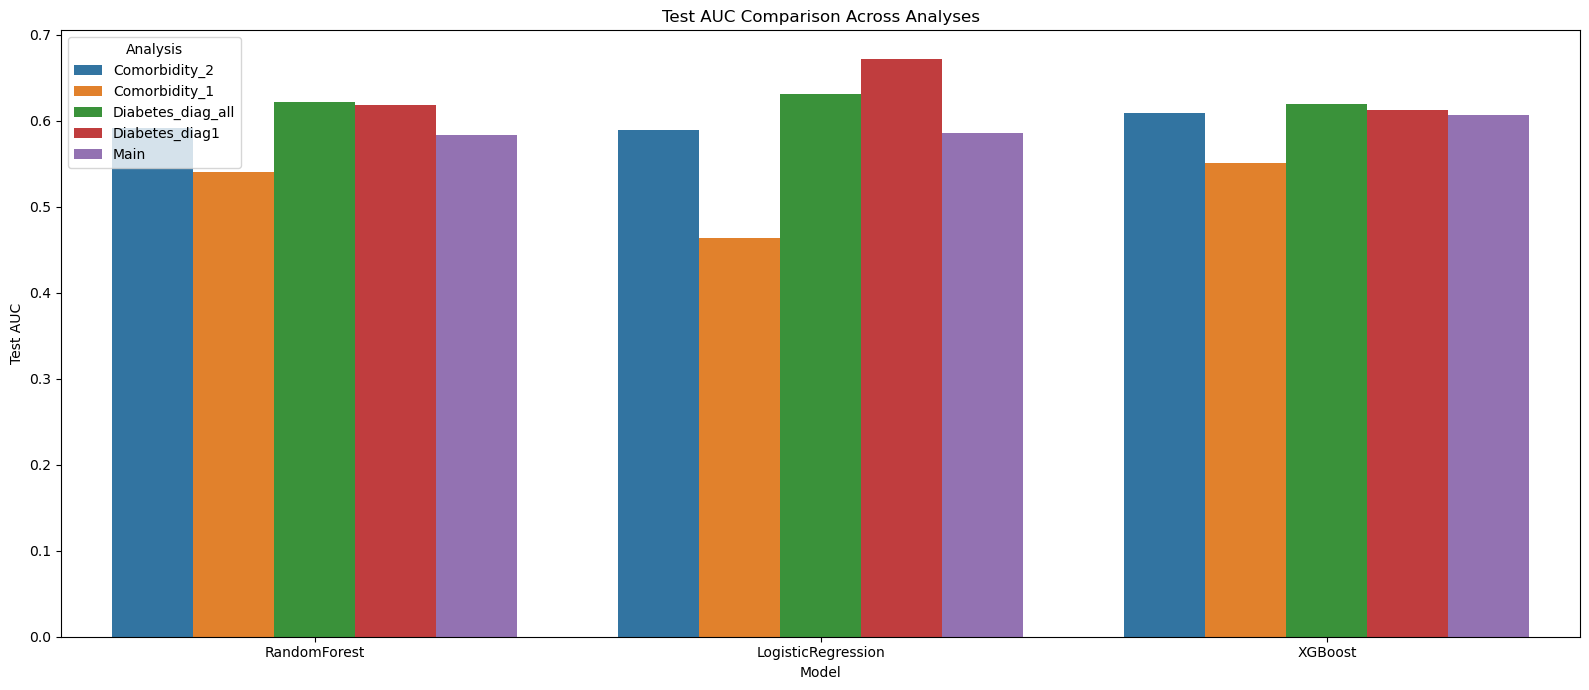

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 7))
sns.barplot(
    data=results_df,
    x='Model',
    y='test_auc',
    hue='Analysis',
    ci=None,
    dodge=True
)
plt.title('Test AUC Comparison Across Analyses')
plt.ylabel('Test AUC')
plt.xticks(rotation=0)
plt.legend(title='Analysis')
plt.tight_layout()
plt.show()

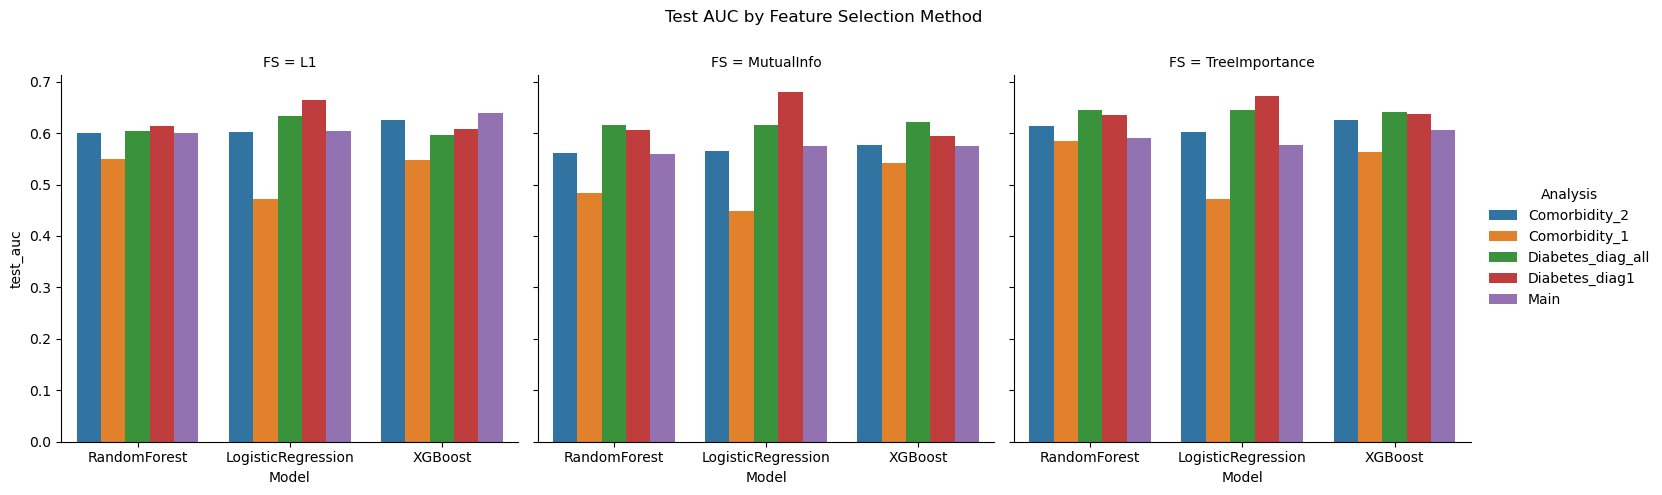

In [5]:
g = sns.catplot(
    data=results_df,
    x='Model',
    y='test_auc',
    hue='Analysis',
    col='FS',
    kind='bar',
    height=5,
    aspect=1
)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Test AUC by Feature Selection Method')
plt.show()

/var/folders/4m/077v5vmn62l9n5_cg7djvzl80000gn/T/ipykernel_27871/21610199.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


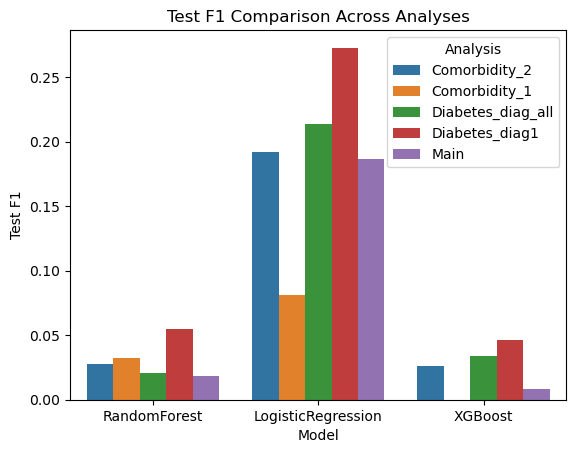

In [6]:
sns.barplot(
    data=results_df,
    x='Model',
    y='test_f1',
    hue='Analysis',
    ci=None,
    dodge=True
)
plt.title('Test F1 Comparison Across Analyses')
plt.ylabel('Test F1')
plt.show()